<a href="https://colab.research.google.com/github/Aayushashrestha/Active-Material/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
from collections import Counter
import nltk
import re
import string
import math

In [3]:
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import csv

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import math

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [8]:
df = pd.read_csv("Twitter_Emotion_Dataset.csv", encoding='latin-1')

In [9]:
df

,label,tweets
0,anger,"Regarding Jalan Jatibaru, the police can't BRE..."
1,anger,"Fellow girls, you know (I think), you should b..."
2,happy,Want gudeg mbarek Bu hj. Amad Photo from googl...
3,anger,"Jln Jatibaru, part of Mr. Abang's area. Region..."
4,happy,"Just sharing my experience, yesterday at 18.00..."
...,...,...
4396,love,Did you know that at that time papa closed his...
4397,fear,The difficulty in determining Jokowi's vice pr...
4398,anger,"5. The future is not clear. Yes, how do you wa..."
4399,happy,"[USERNAME] In the past, a UI Engineering stude..."


In [10]:
df.columns

Index(['label', 'tweets'], dtype='object')

In [11]:
df.shape

(4401, 2)

In [12]:
#no nuls value
df.isnull().sum().sum()

0

In [13]:
df.head()

,label,tweets
0,anger,"Regarding Jalan Jatibaru, the police can't BRE..."
1,anger,"Fellow girls, you know (I think), you should b..."
2,happy,Want gudeg mbarek Bu hj. Amad Photo from googl...
3,anger,"Jln Jatibaru, part of Mr. Abang's area. Region..."
4,happy,"Just sharing my experience, yesterday at 18.00..."


In [14]:
temp = df.groupby('label').count()['tweets'].reset_index().sort_values(by='tweets', ascending=False)
temp.style.background_gradient(cmap='Purples')

,label,tweets
0,anger,1101
2,happy,1017
4,sad,997
1,fear,649
3,love,637


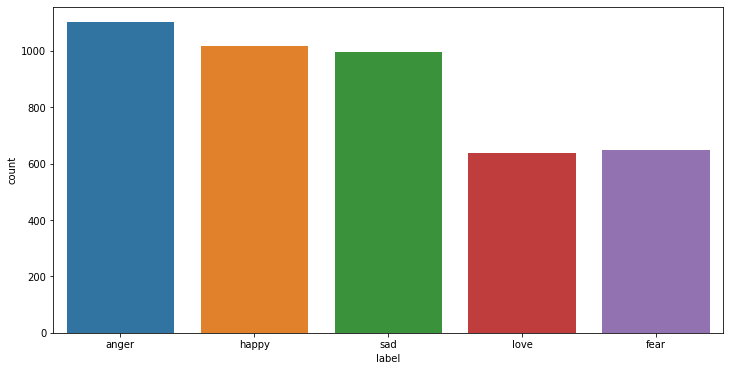

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x='label', data=df)

In [16]:
fig=go.Figure(go.Funnelarea(
    text=temp.label,
    values=temp.tweets,
    title= {"position":"top center", "text": "Funnel-chart on Case Number Distribution"}))
fig.show()

#### Most Common Word

In [17]:
df['temp']= df['tweets'].apply(lambda x: str(x).split())
top= Counter([item for sublist in df['temp'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns=["Common_words", 'count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,5845
1,to,4309
2,I,3331
3,a,2791
4,is,2667
5,of,2382
6,you,2373
7,and,2178
8,[USERNAME],1668
9,that,1630


In [18]:
fig = px.treemap(temp, path=['Common_words'], values='count', title='Tree of Most Common words')
fig.show()

In [19]:
fig = px.bar(temp,x="count", y="Common_words", 
             title="Common words in Selected Text", orientation='h', width=700, height=700,color='Common_words')
fig.show()

In [20]:
most_popular_case = df[df['label']=="anger"]

In [21]:
#MosT common  words in 
top = Counter([item for sublist in most_popular_case['temp'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,the,1687
1,to,1123
2,is,812
3,[USERNAME],778
4,a,694
5,you,679
6,of,626
7,I,482
8,and,475
9,be,407


In [22]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words popular cases Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [23]:
# if n_words=1 -> unigrams, if n_words=2 -> bigrams..
def get_top_Nwords(corpus, n=None, remove_stop_words=False, n_words=1):
    if remove_stop_words:
        vec = CountVectorizer(stop_words='english', ngram_range=(n_words, n_words)).fit(corpus)
    else:
        vec = CountVectorizer(ngram_range=(n_words, n_words)).fit(corpus)
    
    bag_ofWords =vec.transform(corpus)
    sum_words = bag_ofWords.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [24]:
common_words = get_top_Nwords(df['tweets'].drop_duplicates(), 20, remove_stop_words=True, n_words=2)
for word, freq in common_words:
    print(word, freq)

username username 607
don know 128
don want 93
username url 65
love love 62
feel like 55
long time 53
don like 47
social media 46
sexual harassment 40
really love 40
fall love 40
oh god 39
don think 38
just want 37
high school 37
thank god 36
just like 31
allah swt 31
don forget 30


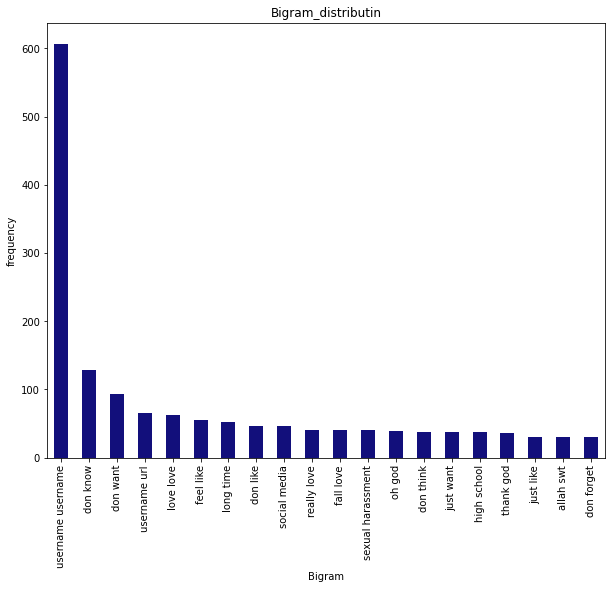

In [25]:
train_temp =pd.DataFrame(common_words, columns=['text', 'count'])
fig = plt.figure(figsize=(10,8))
ax1 = train_temp.groupby('text').sum()['count'].sort_values(ascending=False).plot(kind='bar',
                                                                            color='#120f7b')
ax1.set_title("Bigram_distributin")
ax1.set_xlabel('Bigram')
ax1.set_ylabel("frequency")
plt.show()

#### Biagram Distribution

In [26]:
common_words = get_top_Nwords(df['tweets'].drop_duplicates(), 20, remove_stop_words=True, n_words=3)
for word, freq in common_words:
    print(word, freq)

username username username 295
username username url 27
love love love 19
refuge allah swt 11
amp amp amp 11
built disbelief church 9
don feel like 9
allah swt temptations 9
jatengdaruratkorupsi jatengdaruratkorupsi jatengdaruratkorupsi 8
jatengsaruratkorupsi jatengsaruratkorupsi jatengsaruratkorupsi 8
username username thank 7
username username just 7
don know don 7
places allowed pray 7
allowed pray building 7
pray building built 7
building built disbelief 7
disbelief church refuge 7
church refuge allah 7
swt temptations accursed 7


#### Trigram Distribution

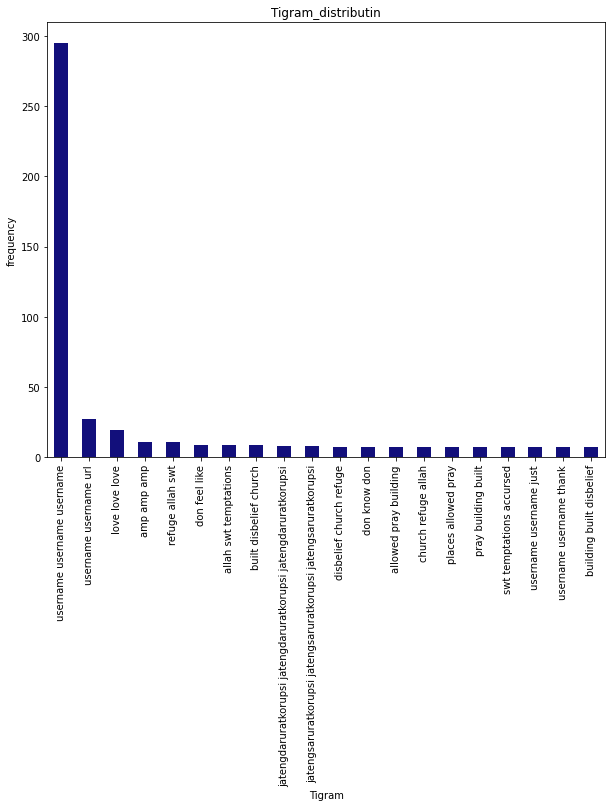

In [27]:
train_temp =pd.DataFrame(common_words, columns=['text', 'count'])
fig = plt.figure(figsize=(10,8))
ax1 = train_temp.groupby('text').sum()['count'].sort_values(ascending=False).plot(kind='bar',
                                                                            color='#120f7b')
ax1.set_title("Tigram_distributin")
ax1.set_xlabel('Tigram')
ax1.set_ylabel("frequency")
plt.show()

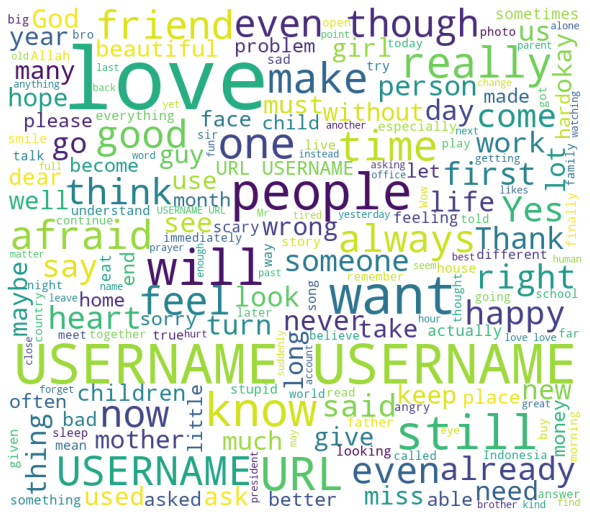

In [28]:
stopwords=set(STOPWORDS)
wordclouds=WordCloud(width=800, 
                    height=700,
                    background_color='white',
                    max_font_size=120,
                    min_font_size=10,
                    stopwords=stopwords).generate(''.join(df['tweets']))

#plot the worldcloud image
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordclouds)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Preprocessing

In [29]:
df['tweets'] = " " + df['tweets'] + " "

In [30]:
#emot
df['tweets'] = df['tweets'].str.replace(r"((\\x[a-z0-9]{1,}){1,})", "")
df['tweets'] = df['tweets'].str.replace("USERNAME", "")
#link
df['tweets'] = df['tweets'].str.replace(r"http\S+", "")
df['tweets'] = df['tweets'].str.replace("URL", "")
#mention
df['tweets'] = df['tweets'].str.replace('@[^\s]+', "")
#hastag
df['tweets'] = df['tweets'].str.replace(r'#([^\s]+)', "")
#baris
df['tweets'] = df['tweets'].str.replace(r"\\n", " ")
#Sensitive number, such as phone number, invoice number and courier
df['tweets'] = df['tweets'].str.replace("SENSITIVE-NO", "")

df['tweets'] = df['tweets'].str.replace("askmf", "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

The default value of regex will change from True to False in a future version.



In [31]:
#Remove punctuation
df['tweets'] = df['tweets'].str.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
#Deleting numbers
df['tweets'] = df['tweets'].replace(regex='\d+', value='')
#lowercase
df['tweets'] = df['tweets'].str.lower()

## Feature Extraction

In [32]:
X = df['tweets']
y = df['label'].values

In [33]:
#text = df['processed']
count_vect = CountVectorizer()
X_count = count_vect.fit_transform(X)

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_count)

## Building Model

## Using Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(multi_class='multinomial', penalty='l2', solver='newton-cg', C= 1.623776739188721)
classifier.fit(X_tfidf, y)

LogisticRegression(C=1.623776739188721, multi_class='multinomial',
                   solver='newton-cg')

In [35]:
from sklearn.model_selection import cross_val_predict
predLR = cross_val_predict(estimator = classifier, X = X_tfidf, y = y, cv = 10)

In [36]:
from sklearn.metrics import confusion_matrix
conf_mat2 = confusion_matrix(y, predLR)
conf_mat2

array([[817,  16,  91,   7, 170],
       [105, 366,  79,  11,  88],
       [131,  19, 651,  32, 184],
       [ 37,   9,  86, 422,  83],
       [252,  18, 182,  52, 493]])

In [37]:
print(classification_report(y, predLR))

              precision    recall  f1-score   support

       anger       0.61      0.74      0.67      1101
        fear       0.86      0.56      0.68       649
       happy       0.60      0.64      0.62      1017
        love       0.81      0.66      0.73       637
         sad       0.48      0.49      0.49       997

    accuracy                           0.62      4401
   macro avg       0.67      0.62      0.64      4401
weighted avg       0.64      0.62      0.63      4401



In [38]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y,predLR))

accuracy is 0.6246307657350603


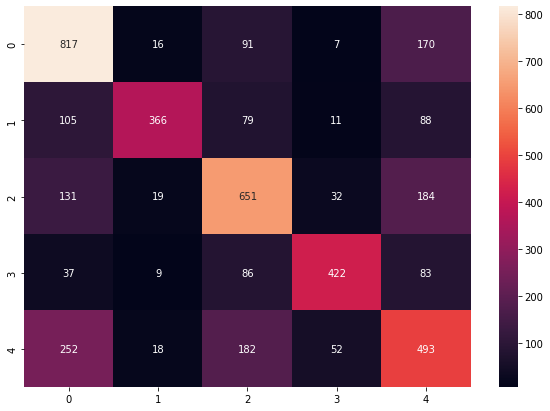

In [39]:
plt.figure(figsize = (10,7))
sns.heatmap(conf_mat2, annot=True, fmt='g')

## Using K-Neighbours Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, leaf_size=1, n_jobs= -1, weights= 'distance')
knn.fit(X_tfidf, y)

KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=10, weights='distance')

In [41]:
predKNN = cross_val_predict(estimator = knn, X = X_tfidf, y = y, cv = 10)

In [42]:
conf_mat = confusion_matrix(y, predKNN)

In [43]:
conf_mat

array([[644,  76,  78, 105, 198],
       [133, 267,  69,  55, 125],
       [156,  86, 409, 167, 199],
       [ 34,  14,  46, 488,  55],
       [232,  85, 111, 194, 375]])

In [44]:
print(classification_report(y, predKNN))

              precision    recall  f1-score   support

       anger       0.54      0.58      0.56      1101
        fear       0.51      0.41      0.45       649
       happy       0.57      0.40      0.47      1017
        love       0.48      0.77      0.59       637
         sad       0.39      0.38      0.38       997

    accuracy                           0.50      4401
   macro avg       0.50      0.51      0.49      4401
weighted avg       0.50      0.50      0.49      4401



In [45]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y,predKNN))

accuracy is 0.49602363099295615


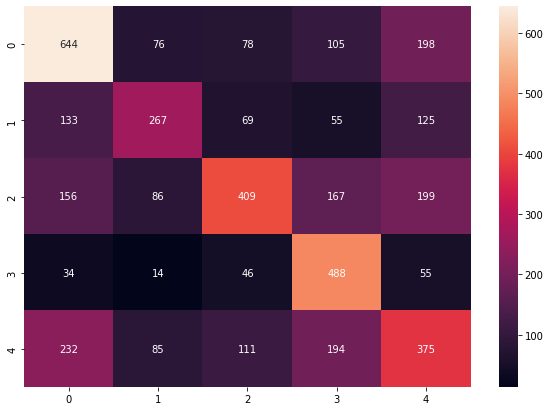

In [46]:
plt.figure(figsize = (10,7))
sns.heatmap(conf_mat, annot=True, fmt='g')


## Using Support Vector Machine


svm=SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm.fit(X_tfidf, y)

In [50]:
from sklearn.svm import SVC
svm=SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm.fit(X_tfidf, y)

svmPred = cross_val_predict(estimator = svm, X = X_tfidf, y = y, cv = 10)

In [51]:
conf_matSVM = confusion_matrix(y, svmPred)
conf_matSVM

    

array([[809,  15,  85,   7, 185],
       [110, 360,  76,  11,  92],
       [123,  16, 623,  39, 216],
       [ 36,  10,  90, 424,  77],
       [250,  15, 155,  51, 526]])

In [52]:
print(classification_report(y,svmPred))

              precision    recall  f1-score   support

       anger       0.61      0.73      0.67      1101
        fear       0.87      0.55      0.68       649
       happy       0.61      0.61      0.61      1017
        love       0.80      0.67      0.73       637
         sad       0.48      0.53      0.50       997

    accuracy                           0.62      4401
   macro avg       0.67      0.62      0.64      4401
weighted avg       0.64      0.62      0.63      4401



In [53]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y,svmPred))



accuracy is 0.6230402181322426


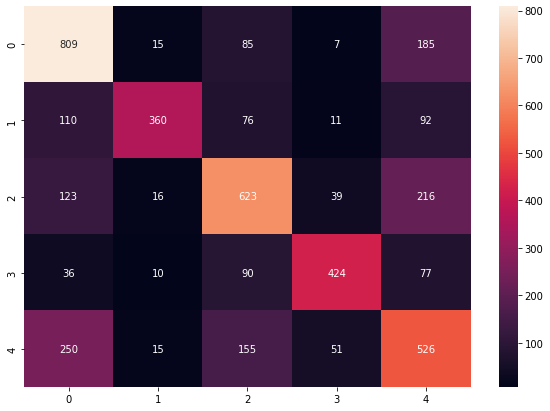

In [54]:
plt.figure(figsize = (10,7))
sns.heatmap(conf_matSVM, annot=True, fmt='g')
